In [13]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Scarica i dati
data = yf.download("QQQ", start="2022-01-01", end="2023-01-01")


[*********************100%%**********************]  1 of 1 completed


In [15]:

# Reset dell'indice per avere 'Date' come colonna
data.reset_index(inplace=True)

# Creazione di una colonna per il numero di giorni dall'inizio
data['Days'] = (data['Date'] - data['Date'].min()).dt.days

# Creazione della variabile target
data["target"] = data["Close"].shift(-1)
data = data.dropna()

# Caratteristiche e target
features = ['Days']
X = data[features].values
y = data["target"].values

# Suddivisione dei dati in train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [16]:
# Creazione e addestramento del modello SVR
svr= SVR(kernel="poly", degree=3, epsilon=0.1, C=100)
svr.fit(X_train, y_train)

# Previsioni
y_pred = svr.predict(X_test)

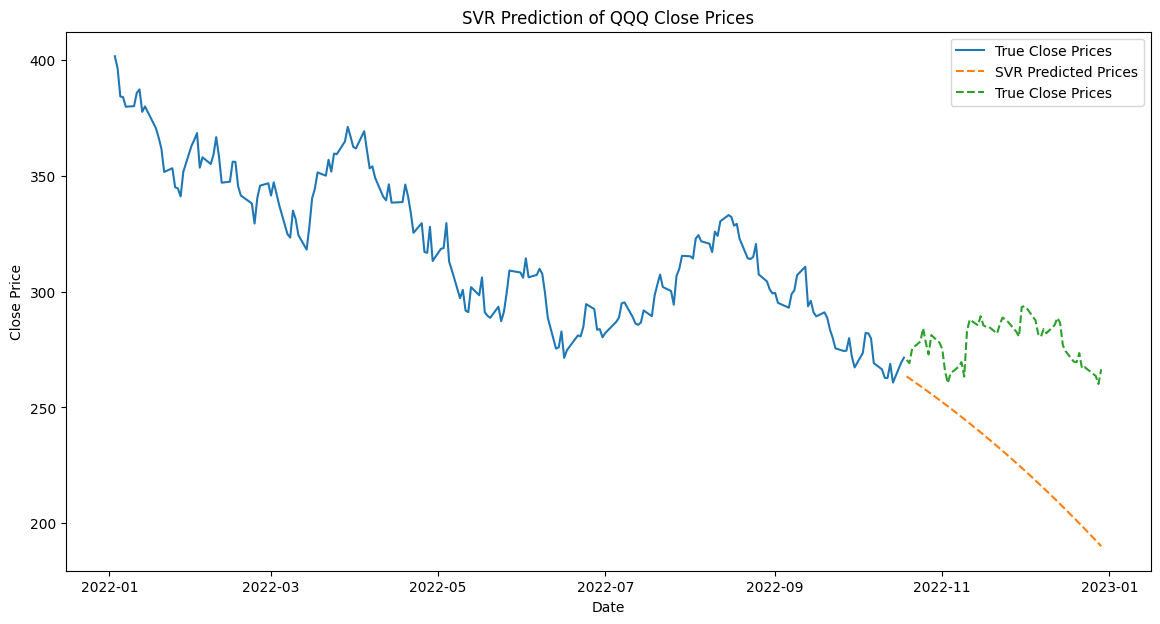

In [17]:
# Visualizzazione dei risultati
plt.figure(figsize=(14, 7))
plt.plot(data['Date'].iloc[:-len(y_test)], data['Close'].iloc[:-len(y_test)], label='True Close Prices')
plt.plot(data['Date'].iloc[-len(y_test):], y_pred, label='SVR Predicted Prices', linestyle='--')
plt.plot(data['Date'].iloc[-len(y_test):], data['Close'].iloc[-len(y_test):], label='True Close Prices', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('SVR Prediction of QQQ Close Prices')
plt.legend()
plt.show()
